# Setup do projeto

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

# Carga de Dados


In [10]:
bike = pd.read_csv('../datasets/hour.csv', index_col=0)
bike.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Analise Exploratoria

In [11]:
print('Dimensoes do dataset compartilhamento de bikes por dia:', bike.shape)

Dimensoes do dataset compartilhamento de bikes por dia: (17379, 16)


In [12]:
bike.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


# Preparacao dos Dados

In [14]:
bike = pd.get_dummies(bike)
bike.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,...,dteday_2012-12-22,dteday_2012-12-23,dteday_2012-12-24,dteday_2012-12-25,dteday_2012-12-26,dteday_2012-12-27,dteday_2012-12-28,dteday_2012-12-29,dteday_2012-12-30,dteday_2012-12-31
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,6,0,1,0.24,0.2879,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,0,6,0,1,0.22,0.2727,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,2,0,6,0,1,0.22,0.2727,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,3,0,6,0,1,0.24,0.2879,...,0,0,0,0,0,0,0,0,0,0
5,1,0,1,4,0,6,0,1,0.24,0.2879,...,0,0,0,0,0,0,0,0,0,0


In [15]:
print('Dimensoes do dataset:',bike.shape)

Dimensoes do dataset: (17379, 746)


# Treinamento e teste do modelo

In [20]:

# Verifica se existem valores Null
bike.isna().sum()

season               0
yr                   0
mnth                 0
hr                   0
holiday              0
                    ..
dteday_2012-12-27    0
dteday_2012-12-28    0
dteday_2012-12-29    0
dteday_2012-12-30    0
dteday_2012-12-31    0
Length: 746, dtype: int64

In [22]:
del bike['dteday']
X = bike.drop('cnt', axis=1).values
y = bike['cnt'].values

KeyError: 'dteday'

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [10]:
print('X_train shape', X_train.shape)
print('X_test shape', X_train.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (584, 744)
X_test shape (584, 744)
y_train shape (584,)
y_test shape (147,)


# Base de comparacao

In [11]:
colunas = list(bike.columns)
y_hist = X_test[:, colunas.index('registered')]

print('MAE :', mean_absolute_error(y_test, y_hist))
print('MSE :', mean_squared_error(y_test, y_hist))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_hist)))

MAE : 769.7210884353741
MSE : 982073.9931972789
RMSE: 990.9964647753688


# Treimamento do modelo

In [12]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
y_pred = rf.predict(X_test)

print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MSE : ',mean_squared_error(y_test, y_pred))
print('RMSE : ',np.sqrt(mean_squared_error(y_test, y_pred)))

MAE :  68.39462585034012
MSE :  10879.161554421766
RMSE :  104.30321929078588


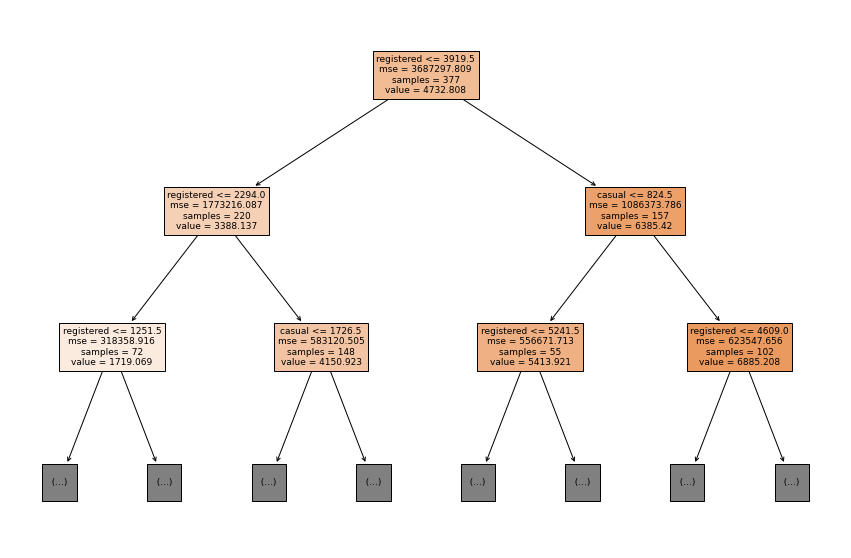

In [14]:
fig = plt.figure(figsize=(15,10))
_=plot_tree(rf.estimators_[5], filled=True, feature_names=colunas, max_depth=2)

# Treimamento do modelo - xxxxxxxxxxxx

In [15]:

X = bike.drop('cnt', axis=1).values
y = bike['cnt'].values

In [16]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [17]:
print('X_train shape', X_train.shape)
print('X_test shape', X_train.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (584, 744)
X_test shape (584, 744)
y_train shape (584,)
y_test shape (147,)


In [18]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


colunas = list(bike.columns)
y_hist = X_test[:, colunas.index('registered')]
print('MAE :', mean_absolute_error(y_test, y_hist))
print('MSE :', mean_squared_error(y_test, y_hist))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_hist)))

MAE : 769.7210884353741
MSE : 982073.9931972789
RMSE: 990.9964647753688


In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
importancias = list(rf.feature_importances_)
variaveis_importancias = [(coluna, importancia) for coluna, importancia in zip(colunas, importancias)]
variaveis_importancias = sorted(variaveis_importancias, key=lambda x:x[1], reverse=True)
for v, i in variaveis_importancias:
    print(f'Variavel: {v:10} - Importancia: {i}')

12e-07
Variavel: dteday_2011-10-30 - Importancia: 1.769417042698255e-07
Variavel: dteday_2011-10-06 - Importancia: 1.7473279929896686e-07
Variavel: dteday_2011-03-08 - Importancia: 1.7283715386028197e-07
Variavel: dteday_2012-07-11 - Importancia: 1.6937042849975188e-07
Variavel: dteday_2011-06-22 - Importancia: 1.6871833120106257e-07
Variavel: dteday_2012-12-09 - Importancia: 1.6577117440379956e-07
Variavel: dteday_2012-01-12 - Importancia: 1.6400984281903865e-07
Variavel: dteday_2012-02-20 - Importancia: 1.6335205758555966e-07
Variavel: dteday_2012-10-23 - Importancia: 1.6279680927151813e-07
Variavel: dteday_2012-10-22 - Importancia: 1.6270338964317192e-07
Variavel: dteday_2011-04-27 - Importancia: 1.6237759506656852e-07
Variavel: dteday_2012-02-05 - Importancia: 1.607848254629767e-07
Variavel: cnt        - Importancia: 1.58308149834226e-07
Variavel: dteday_2011-02-03 - Importancia: 1.56355268523995e-07
Variavel: dteday_2011-05-30 - Importancia: 1.5459985832776544e-07
Variavel: dteday

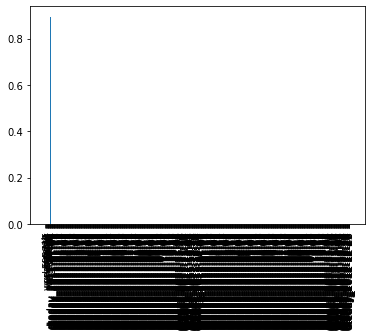

In [21]:

import matplotlib.pyplot as plt
X_valores = list(range(len(importancias)))
_=plt.bar(X_valores, importancias)
colunas = colunas[:-1]
_=plt.xticks(X_valores, colunas, rotation='vertical')

# Importância das variáveis independentes

In [ ]:
importancias = list(rf.feature_importances_)
variaveis_importancias = [(coluna, importancia) for coluna, importancia in zip(colunas, importancias)]
variaveis_importancias = sorted(variaveis_importancias, key=lambda x:x[1], reverse=True)
for v, i in variaveis_importancias:
    print(f'Variavel: {v:10} - Importancia: {i}')

In [23]:
X_valores = list(range(len(importancias)))
_=plt.bar(X_valores, importancias)
colunas = colunas[:-1]
_=plt.xticks(X_valores, colunas, rotation='vertical')

ValueError: The number of FixedLocator locations (745), usually from a call to set_ticks, does not match the number of ticklabels (744).

In [17]:
rf_imp = RandomForestRegressor(n_estimators=100, random_state=42)
indices = [colunas.index('casual'), colunas.index('registered')]
X_train_imp = X_train[:, indices]
X_test_imp = X_test[:, indices]
rf_imp.fit(X_train_imp, y_train)

RandomForestRegressor(random_state=42)

In [18]:
y_pred = rf_imp.predict(X_test_imp)
print('MAE :', mean_absolute_error(y_test, y_pred))
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 47.26238095238095
MSE : 6518.596112244898
RMSE: 80.73782330633455


In [19]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

colunas = list(locacao.columns)
y_hist = X_test[:, colunas.index('cnt')]

print('MAE : ', mean_absolute_error(y_test, y_hist))
print('MSE : ',mean_squared_error(y_test, y_hist))
print('RMSE : ',np.sqrt(mean_squared_error(y_test, y_hist)))

NameError: name 'locacao' is not defined

## Treinamento do modelo

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
y_pred = rf.predict(X_test)

print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MSE : ',mean_squared_error(y_test, y_pred))
print('RMSE : ',np.sqrt(mean_squared_error(y_test, y_pred)))

MAE :  0.9612744533947064
MSE :  7.5681270138089785
RMSE :  2.7510229031778306


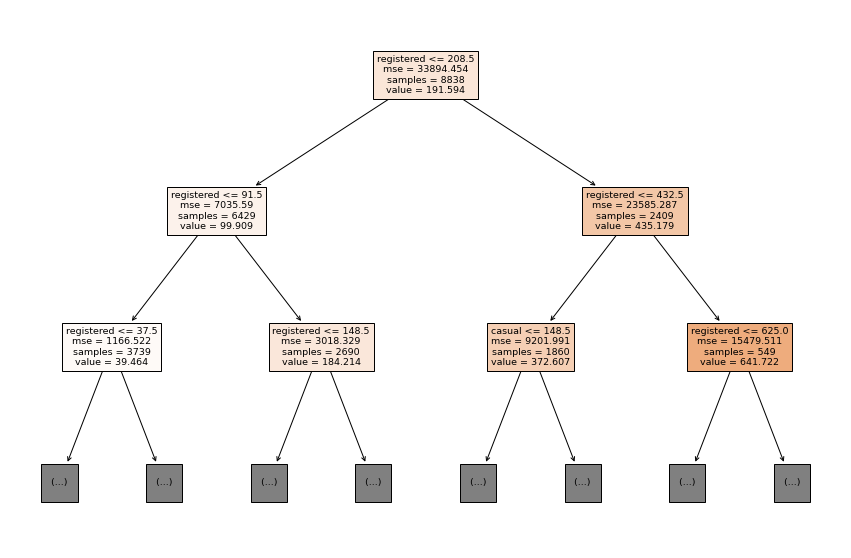

In [36]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(15,10))
_=plot_tree(rf.estimators_[5], filled=True, feature_names=colunas, max_depth=2)

## Importância das variáveis independentes

In [37]:
importancias = list(rf.feature_importances_)
variaveis_importancias = [(coluna, importancia) for coluna, importancia in zip(colunas, importancias)]
variaveis_importancias = sorted(variaveis_importancias, key=lambda x:x[1], reverse=True)

for v,i in variaveis_importancias:
    print('Variavel {:10} - Importancia {}'.format(v,i))

- Importancia 2.1928120089537743e-08
Variavel dteday_2011-07-05 - Importancia 2.188630923342815e-08
Variavel dteday_2012-03-05 - Importancia 2.1828873882874454e-08
Variavel dteday_2012-03-09 - Importancia 2.161822978925471e-08
Variavel dteday_2011-09-12 - Importancia 2.1587170904577065e-08
Variavel dteday_2011-08-20 - Importancia 2.1563507791250784e-08
Variavel dteday_2011-10-23 - Importancia 2.1476406078118924e-08
Variavel dteday_2011-12-12 - Importancia 2.1314094886224015e-08
Variavel dteday_2012-02-25 - Importancia 2.1298237268880778e-08
Variavel dteday_2012-04-12 - Importancia 2.128124209271431e-08
Variavel dteday_2011-04-25 - Importancia 2.1109174153167366e-08
Variavel dteday_2012-11-17 - Importancia 2.105063170942413e-08
Variavel dteday_2011-04-27 - Importancia 2.1044841326049888e-08
Variavel dteday_2012-10-27 - Importancia 2.0746468091687203e-08
Variavel dteday_2012-03-03 - Importancia 2.0569463986341884e-08
Variavel dteday_2011-02-18 - Importancia 2.041856724683494e-08
Variavel

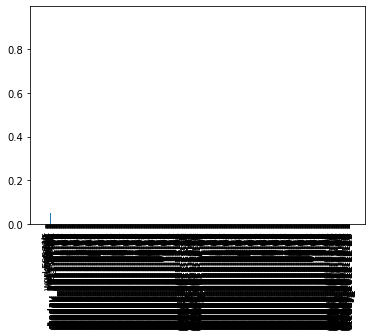

In [38]:
X_valores = list(range(len(importancias)))
_=plt.bar(X_valores, importancias)
colunas = colunas[:-1]
_=plt.xticks(X_valores, colunas, rotation='vertical')

## Variaveis mais importantes

In [39]:
rf_imp = RandomForestRegressor(n_estimators=100, random_state=42)
indices = [colunas.index('temp_1'), colunas.index('cnt')]
X_train_imp = X_train[:, indices]
X_test_imp = X_test[:, indices]
rf_imp.fit(X_train_imp, y_train)

ValueError: 'temp_1' is not in list

In [ ]:
meses = set(dy['mnth'])
print(meses)

horas = set(dy['hr'])
print(horas)

dia_da_semana = set(dy['weekday'])
print(dia_da_semana)

temperatura = set(dy['atemp'])
print(temperatura)